# Real time audio visualizing 

source: https://www.youtube.com/watch?v=AShHJdSIxkY&t=39s

## Contents
0. Install packages
1. Show live waveplot
2. Show live audio spectrum (with FFT) (TO DO)
3. Show live spectrogram (with isues...)


### To do:
- 2nd part of tutorial: display the audio spectrum in real time
- using https://github.com/cdens/PySpectrogram to display real time spectrogram

In [1]:
## 0. Install packages

## 1. Plot live waveform

In [24]:
import pyaudio
import struct #struct will unpack audio data into integers
import numpy as np
import matplotlib.pyplot as plt

%matplotlib tk
#%matplotlib qt
#
%matplotlib inline
CHUNK = 1024 * 2 #=2048
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100 #sample rate

<IPython.core.display.Javascript object>


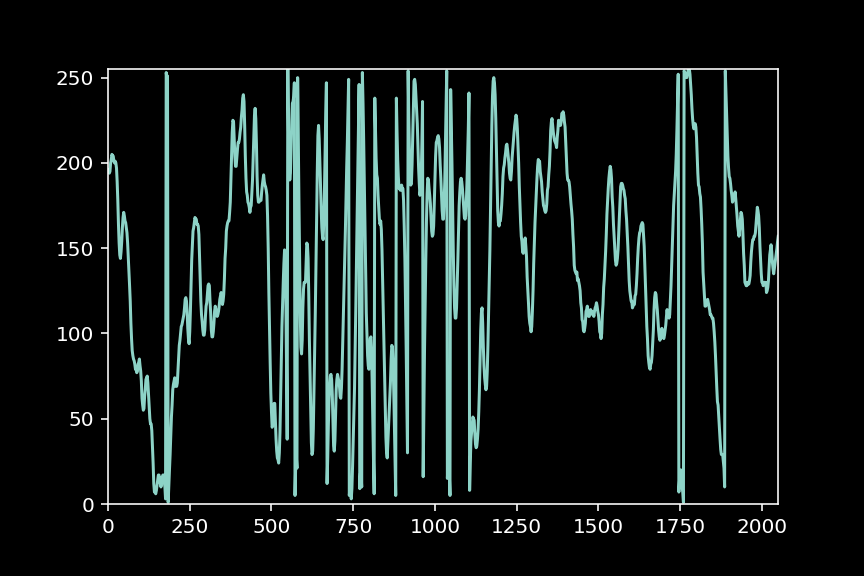

KeyboardInterrupt: 

In [23]:
%matplotlib notebook
p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)
fig, ax = plt.subplots()

x= np.arange(0, 2 * CHUNK, 2)
line, = ax.plot(x, np.random.rand(CHUNK))
ax.set_ylim(0,255)
ax.set_xlim(0, CHUNK)

while True:
    data = stream.read(CHUNK)
    #data_int = struct.unpack(str(CHUNK)+'h', data) 
    data_int = np.array(struct.unpack(str(2*CHUNK)+ 'B', data), dtype='b' )[::2]+ 128
    line.set_ydata(data_int)
    fig.canvas.draw()
    fig.canvas.flush_events()
# Close and terminate the stream
stream.close()
p.terminate()

## 2. Plot live audio spectrum (with FFT)

In [25]:
import pyaudio
import struct #struct will unpack audio data into integers
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

%matplotlib tk
#%matplotlib qt
#
%matplotlib inline
CHUNK = 1024 * 2 #=2048
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100 #sample rate

In [ ]:
#SOURCE: https://www.youtube.com/watch?v=aQKX3mrDFoY&t=53s
%matplotlib notebook
p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)
fig, (ax, ax2) = plt.subplots(2, figsize=(15,8))

#variables for plotting
x= np.arange(0, 2 * CHUNK, 2)
x_fft = np.linspace(0, RATE, CHUNK)

#create a line object with random data
line, = ax.plot(x, np.random.rand(CHUNK), '-', lw=2)
line_fft = ax2.plot(x_fft, np.random.rand(CHUNK), '-', lw=2)#linewidth

#formatting axes
ax.set_ylim(0,255)
ax.set_xlim(0, CHUNK)
ax.set_title('Audio Waveform')

ax2.set_xlim(20, RATE / 2)

while True:
    data = stream.read(CHUNK)
    #data_int = struct.unpack(str(CHUNK)+'h', data) 
    data_int = np.array(struct.unpack(str(2*CHUNK)+ 'B', data), dtype='b' )[::2]+ 128
    line.set_ydata(data_int)
    fig.canvas.draw()
    fig.canvas.flush_events()
# Close and terminate the stream
stream.close()
p.terminate()

## 3. Plot live spectrogram

In [11]:
from glob import glob
my_wavs = glob('*.wav')
print(my_wavs)

['my-audio.wav', 'new_file.wav', 'out.wav', 'file.wav', 'loudness.wav', 'test2.wav', 'claxon_iphone.wav', 'test3.wav', 'my_wav.wav', 'mywav_reduced_noise2.wav', 'Yoda.wav', 'piano_c.wav', 'claxon_michiel.wav', 'claxon_close.wav', 'miaow_16k.wav', 'tone_220.wav', 'welcome.wav', 'silence.wav', 'example.wav', '11k16bitpcm.wav', 'claxon_freesound.wav', 'robot0.wav', 'my_test.wav', 'converted.wav', 'speech_whistling2.wav', 'robot1.wav', 'mywav_reduced_noise.wav', 'robot3.wav', 'test.wav', 'noise_add.wav', 'converted2.wav', 'robot2.wav', 'Sample_audio.wav', 'tone_440.wav', 'claxon_1m.wav', 'output.wav']


### 3a. Frame by Frame

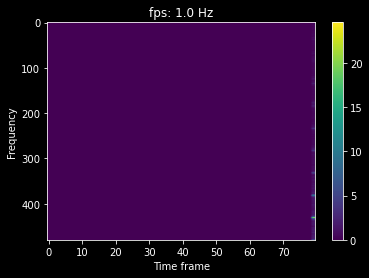

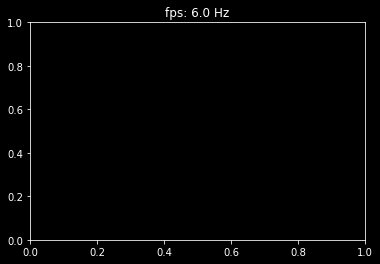

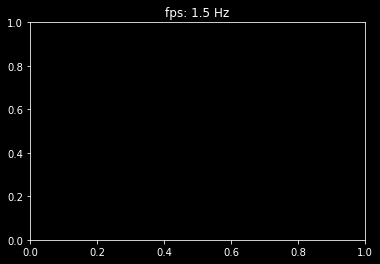

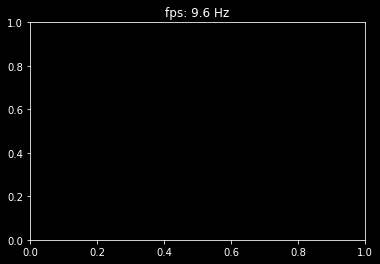

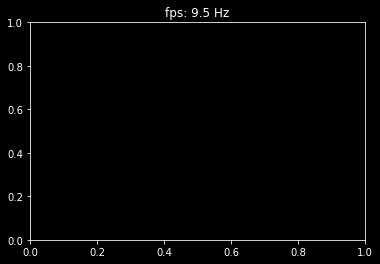

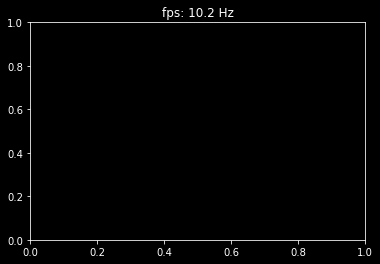

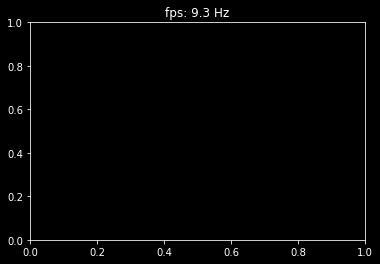

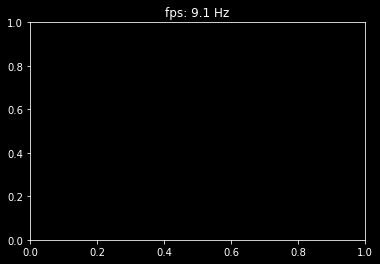

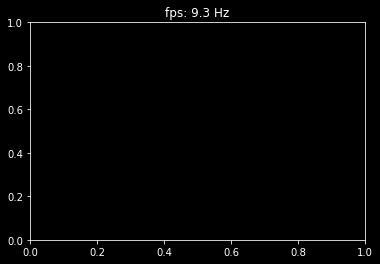

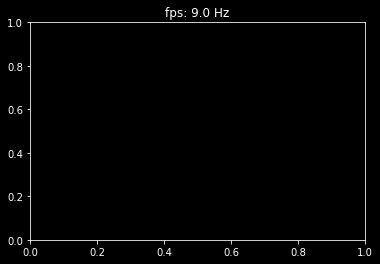

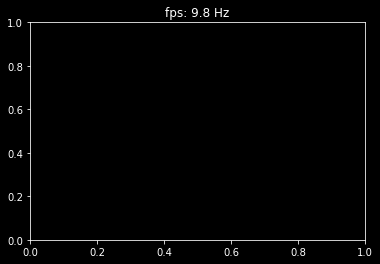

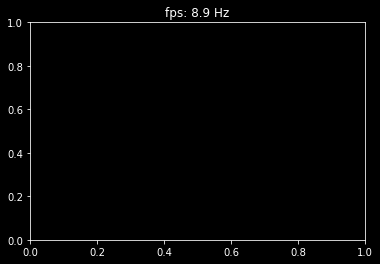

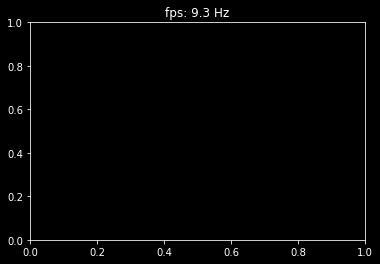

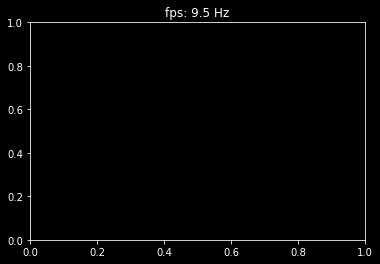

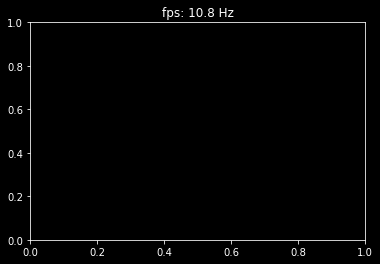

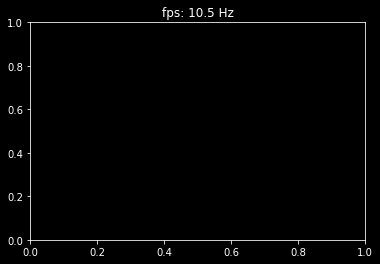

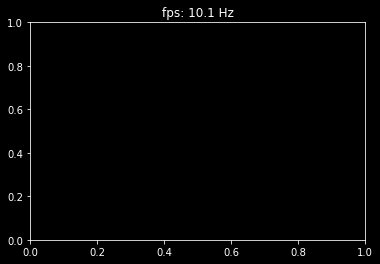

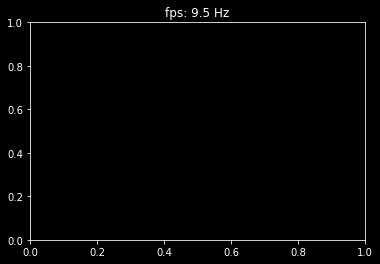

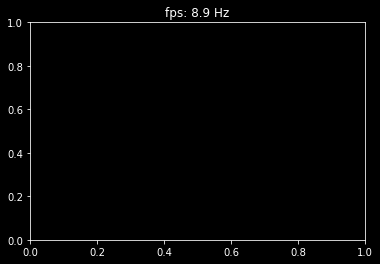

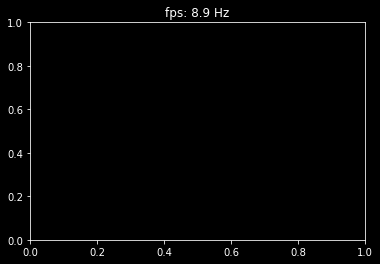

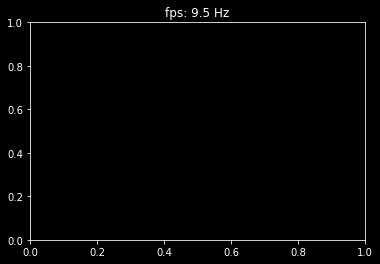

In [17]:
#source: https://github.com/Kurene/plot-spectrogram-in-realtime-by-matplotlib
# this script creates frame after frame and so create a movie...
%matplotlib inline
"""
License: MIT
Created by Kurene@wizard-notes.com
"""
import time
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

plt.style.use('dark_background')


# Parameters (audio)
sr         = 44100
n_ch       = 2
filepath   = "piano_c.wav"
n_fft      = 4096
hop_length = int(n_fft / 4 * 3) # 0 <= hop_length < n_fft
overlap    = n_fft - hop_length
n_plot_tf  = 80
n_freqs    = n_fft//2 + 1
f_max_idx  = 480 # 1 < f_max_idx < n_freqs
window     = np.hamming(n_fft)
amp        = np.zeros((n_plot_tf, f_max_idx))

# Parameters (plot, video)
fps = 1.0
fig, ax = plt.subplots()
image = ax.imshow(amp.T, aspect="auto")
ax.set_xlabel(f"Time frame")
ax.set_ylabel(f"Frequency")
fig.colorbar(image)
vmax, vmin = 1.0, 0.0
#min_fps = sr / hop_length

pretime = time.time()
for index, block in enumerate(sf.blocks(filepath, blocksize=n_fft, overlap=overlap)):
    if block.shape[0] != n_fft:
        continue
    
    x = np.mean(block, axis=1) # to monoral
    amp[-1] = np.sqrt(np.abs(np.fft.rfft(window * x)))[0:f_max_idx]
    if vmax < np.max(amp[-1]):
        vmax = np.max(amp[-1])
    image.set_clim(vmin, vmax)
    image.set_data(amp.T[::-1])
    
    #plt.title(f"fps: {fps:0.1f} Hz\n(min. fps requirement: {min_fps:0.1f} Hz)")
    plt.title(f"fps: {fps:0.1f} Hz")
    plt.pause(0.001)

    amp[0:-1] = amp[1::]

    curtime = time.time()
    time_diff = curtime - pretime
    fps = 1.0/(time_diff + 1e-16)
    #print(f"{index}:\t{time_diff:0.3f} sec")
    pretime = curtime
    
plt.close()

### 3b. Using PySpectrogram
source: https://github.com/cdens/PySpectrogram

This package uses pyQt5 to create a GUI. Not sure whether this works in Jupyter Notebook...